# Beispiel: Hauptkomponentenanalyse Bundestagswahl 2021

Dies ist ein Notebook, welches die [Hauptkomponentenanalyse](https://de.wikipedia.org/wiki/Hauptkomponentenanalyse) auf die Positionen der Parteien auf die Thesen zur Bundestagswahl 2021 anwendet. Die Thesen und die Positionen wurden von der [Bundeszentrale für politische Bildung](https://www.bpb.de/) im Rahmen des [Wahl-O-Mats](https://www.bpb.de/themen/wahl-o-mat/) erstellt und veröffentlicht.

Zuerst werden alle benötigten Module importiert.

In [1]:
from IPython.display import display
from IPython.display import Markdown
import matplotlib.pyplot as plt
import numpy as np
from pca_wahl import utils
from sklearn.decomposition import PCA

In [2]:
plt.rcParams["figure.dpi"] = 200.

## Laden der Daten

Dann werden die Daten zur Bundetagswahl über eine vordefinierte Funktion geladen.

In [3]:
data = utils.load_election("2021-09-26_de")

## Nutzungsbedingungen

Zunächst seinen die Nutzungsbedingungen erwähnt.

In [4]:
print(data.note)

Hinweis zur Verwendung des Wahl-O-Mat-Datensatzes

Die Bundeszentrale für politische Bildung ist Urheber des nachfolgend veröffentlichten „Wahl-O-Mat-Datensatzes“. 
Die Veröffentlichung des Datensatzes dient lediglich dem Zugang zu den in ihm enthaltenen Informationen. 
Jede Nutzung des Datensatzes, egal welcher Art, wird untersagt. Die Schranken des Urheberrechts durch gesetzlich erlaubte Nutzung bleiben hiervon unberührt.

Eine Ausnahme gilt nur für die Analyse des Datensatzes zu wissenschaftlichen oder journalistischen Zwecken sowie für die Veröffentlichung der Ergebnisse dieser Analyse. 
Dabei muss jederzeit klar erkennbar sein, dass die Bundeszentrale für politische Bildung nicht Urheber dieser Analyse ist.

Explizit untersagt ist in diesem Rahmen die Nutzung des Datensatzes für die Erstellung von Angeboten, in deren Rahmen– ähnlich dem Wahl-O-Mat – Nutzerinnen und Nutzer sich auf Basis der eigenen Positionen ihre Nähe zu den Parteien anzeigen oder errechnen lassen können.

Bei Fr

## Disclaimer

An dieser Stelle sei erähnt, dass diese Analyse zu **wissenschaftlichen und journalistischen Zwecken** erstellt und veröffentlicht wurde. Es besteht **keine Verbindung zur Bundeszentrale für politische Bildung**.

## Bereinigung

Der Datensatz kann nun nach Belieben über eine vordefinierte Funktion bereinigt werden. Zum Beispiel um Parteien zu entfernen, die aus Gründen alle Thesen mit "neutral" beantwortet haben und damit nicht sinnvoll in einer Hauptkomponentenanalyse dargestellt werden können.

In [5]:
remove = [
    "Gesundheitsforschung",
]

In [6]:
data = utils.remove_party_from_data(data, remove=remove)

Folgende Parteien verbleiben im Datensatz:

In [7]:
data.parties

array(['CDU / CSU', 'SPD', 'AfD', 'FDP', 'DIE LINKE', 'GRÜNE',
       'FREIE WÄHLER', 'Die PARTEI', 'Tierschutzpartei', 'NPD', 'PIRATEN',
       'ÖDP', 'V-Partei³', 'DiB', 'BP', 'Tierschutzallianz', 'MLPD',
       'MENSCHLICHE WELT', 'DKP', 'Die Grauen', 'BüSo', 'Die Humanisten',
       'du.', 'SGP', 'dieBasis', 'Bündnis C', 'BÜRGERBEWEGUNG',
       'III. Weg', 'BÜNDNIS21', 'LIEBE', 'LKR', 'PdF', 'LfK', 'SSW',
       'Team Todenhöfer', 'UNABHÄNGIGE', 'Volt'], dtype=object)

### Hilfsvariablen

Nun lassen sich Hilfsvariablen definieren.

In [8]:
N_par, N_the = data.X.shape

In [9]:
N_komp = np.minimum(N_par, N_the)

In [10]:
N_max = 10
parties_short = []
for party in data.parties:
    if len(party) > N_max:
        parties_short.append(party[:N_max]+"...")
    else:
        parties_short.append(party)

## Die Thesen

Diese Thesen waren teil des Wahl-O-Mats:

In [11]:
md = []
for i in range(data.statements.shape[0]):
    md.append("* **These {:d}: {}** <br/> {}".format(i+1, data.statements[i], data.statements_long[i]))
display(Markdown("\n".join(md)))

* **These 1: Tempolimit auf Autobahnen** <br/> Auf allen Autobahnen soll ein generelles Tempolimit gelten.
* **These 2: Erhöhung der Verteidigungsausgaben** <br/> Deutschland soll seine Verteidigungsausgaben erhöhen.
* **These 3: Wählen ab 16** <br/> Bei Bundestagswahlen sollen auch Jugendliche ab 16 Jahren wählen dürfen.
* **These 4: Windenergie** <br/> Die Förderung von Windenergie soll beendet werden.
* **These 5: Begrenzung für Mieterhöhungen** <br/> Die Möglichkeiten der Vermieterinnen und Vermieter, Wohnungsmieten zu erhöhen, sollen gesetzlich stärker begrenzt werden.
* **These 6: Patentschutz für Impfstoffe** <br/> Impfstoffe gegen Covid-19 sollen weiterhin durch Patente geschützt sein.
* **These 7: Ausstieg aus der Kohleverstromung** <br/> Der für das Jahr 2038 geplante Ausstieg aus der Kohleverstromung soll vorgezogen werden.
* **These 8: Gesetzliche Rentenversicherung** <br/> Alle Erwerbstätigen sollen in der gesetzlichen Rentenversicherung versichert sein müssen.
* **These 9: Abschaffung des Familiennachzugs** <br/> Das Recht anerkannter Flüchtlinge auf Familiennachzug soll abgeschafft werden.
* **These 10: Steuer auf digitale Dienstleistungen** <br/> Auf den Umsatz, der in Deutschland mit digitalen Dienstleistungen erzielt wird, soll eine nationale Steuer erhoben werden.
* **These 11: Traditionelle Familie** <br/> Die traditionelle Familie aus Vater, Mutter und Kindern soll stärker als andere Lebensgemeinschaften gefördert werden.
* **These 12: Parteispenden** <br/> Spenden von Unternehmen an Parteien sollen weiterhin erlaubt sein.
* **These 13: Elternunabhängiges BAföG** <br/> Studentinnen und Studenten sollen BAföG unabhängig vom Einkommen ihrer Eltern erhalten.
* **These 14: Doppelte Staatsbürgerschaft** <br/> In Deutschland soll es generell möglich sein, neben der deutschen eine zweite Staatsbürgerschaft zu haben.
* **These 15: Sprachliche Berücksichtigung von Geschlechtsidentitäten** <br/> Bundesbehörden sollen in ihren Veröffentlichungen unterschiedliche Geschlechtsidentitäten sprachlich berücksichtigen.
* **These 16: Nord Stream 2** <br/> Die Ostsee-Pipeline "Nord Stream 2", die Gas von Russland nach Deutschland transportiert, soll wie geplant in Betrieb gehen dürfen.
* **These 17: Abschaffung des Solidaritätszuschlags** <br/> Der Solidaritätszuschlag soll vollständig abgeschafft werden.
* **These 18: Kopftuch im Dienst** <br/> Das Tragen eines Kopftuchs soll Beamtinnen im Dienst generell erlaubt sein.
* **These 19: Verbrennungsmotor** <br/> Die Zulassung von neuen Autos mit Verbrennungsmotor soll auch langfristig möglich sein.
* **These 20: Schulpolitik** <br/> Der Bund soll mehr Zuständigkeiten in der Schulpolitik erhalten.
* **These 21: Antisemitismus** <br/> Der Bund soll Projekte zur Bekämpfung des Antisemitismus stärker finanziell unterstützen.
* **These 22: Aufträge an chinesische Firmen** <br/> Chinesische Firmen sollen keine Aufträge für den Ausbau der Kommunikationsinfrastruktur in Deutschland erhalten dürfen.
* **These 23: Kirchensteuer** <br/> Der Staat soll weiterhin für Religionsgemeinschaften die Kirchensteuer einziehen.
* **These 24: Verkauf von Cannabis** <br/> Der kontrollierte Verkauf von Cannabis soll generell erlaubt sein.
* **These 25: Austritt aus der EU** <br/> Deutschland soll aus der Europäischen Union austreten.
* **These 26: Frauen und Männer auf Landeslisten** <br/> Die Landeslisten der Parteien für die Wahlen zum Deutschen Bundestag sollen abwechselnd mit Frauen und Männern besetzt werden müssen.
* **These 27: Abrechnung über Fallpauschalen** <br/> Stationäre Behandlungen im Krankenhaus sollen weiterhin über eine Fallpauschale abgerechnet werden. 
* **These 28: Steuer auf hohe Vermögen** <br/> Auf hohe Vermögen soll wieder eine Steuer erhoben werden.
* **These 29: Gesichtserkennung bei Videoüberwachung** <br/> Bei der Videoüberwachung öffentlicher Plätze soll Gesichtserkennungssoftware eingesetzt werden dürfen.
* **These 30: Ehepaare ohne Kinder** <br/> Auch Ehepaare ohne Kinder sollen weiterhin steuerlich begünstigt werden.
* **These 31: Ökologische Landwirtschaft** <br/> Ökologische Landwirtschaft soll stärker gefördert werden als konventionelle Landwirtschaft.
* **These 32: Islamische Verbände** <br/> Islamische Verbände sollen als Religionsgemeinschaften staatlich anerkannt werden können.
* **These 33: Anstieg des CO2-Preises** <br/> Der staatlich festgelegte Preis für den Ausstoß von CO2 beim Heizen und Autofahren soll stärker steigen als geplant.
* **These 34: Schuldenbremse** <br/> Die Schuldenbremse im Grundgesetz soll beibehalten werden.
* **These 35: Asyl nur für politisch Verfolgte** <br/> Asyl soll weiterhin nur politisch Verfolgten gewährt werden.
* **These 36: Erhöhung des Mindestlohns** <br/> Der gesetzliche Mindestlohn soll spätestens im Jahr 2022 auf mindestens 12 Euro erhöht werden.
* **These 37: Besteuerung des Flugverkehrs** <br/> Der Flugverkehr soll höher besteuert werden.
* **These 38: Homeoffice** <br/> Unternehmen sollen selbst entscheiden, ob sie ihren Beschäftigten das Arbeiten im Homeoffice erlauben.

Auf diese Thesen konnten die Parteien mit "stimme zu", "stimme nicht zu" und "neutral" antworten. Die Antworten wurde für diese Analyse in die Ganzzahlen $1$, $-1$ und $0$ konvertiert. Damit spannen die Parteien einen $N$-dimensionalen Raum auf, wobei $N$ die Anzahl der Thesen ist.

## Korrelationsmatrix

Aus den Daten kann nun eine [Korrelationsmatrix](https://de.wikipedia.org/wiki/Korrelationsmatrix) erstellt werden, welche sich wie folgt darstellen lässt, wobei ein blauer Wert Korrelation und ein roter Wert Antikorrelation bedeutet. Ein weißer Wert bedeutet keine Korrelation.

**Beispiel 1:**  
Der Wert $\left(28, 5\right)$ ist blau. Das bedeutet die Thesen $28$ und $5$ korrelieren. Stimmt eine Partei der These _"Auf hohe Vermögen soll wieder eine Steuer erhoben werden."_ zu bzw. nicht zu, stimmt sie oftmals auch der These _"Die Möglichkeiten der Vermieterinnen und Vermieter, Wohnungsmieten zu erhöhen, sollen gesetzlich stärker begrenzt werden."_ zu bzw. nicht zu.

**Beispiel 2:**  
Der Wert $\left(14, 4\right)$ ist rot. Das bedeutet die Thesen $14$ und $4$ antikorrelieren. Stimmt eine Partei der These _"In Deutschland soll es generell möglich sein, neben der deutschen eine zweite Staatsbürgerschaft zu haben."_ zu bzw. nicht zu, stimmt sie im Gegensatz oftmals der These _"Die Förderung von Windenergie soll beendet werden."_ nicht zu bzw. zu.

Die Diagonale ist tiefblau, weil die Thesen natürlich mit sich selbst korrelieren.

In [12]:
P = np.corrcoef(data.X.T)

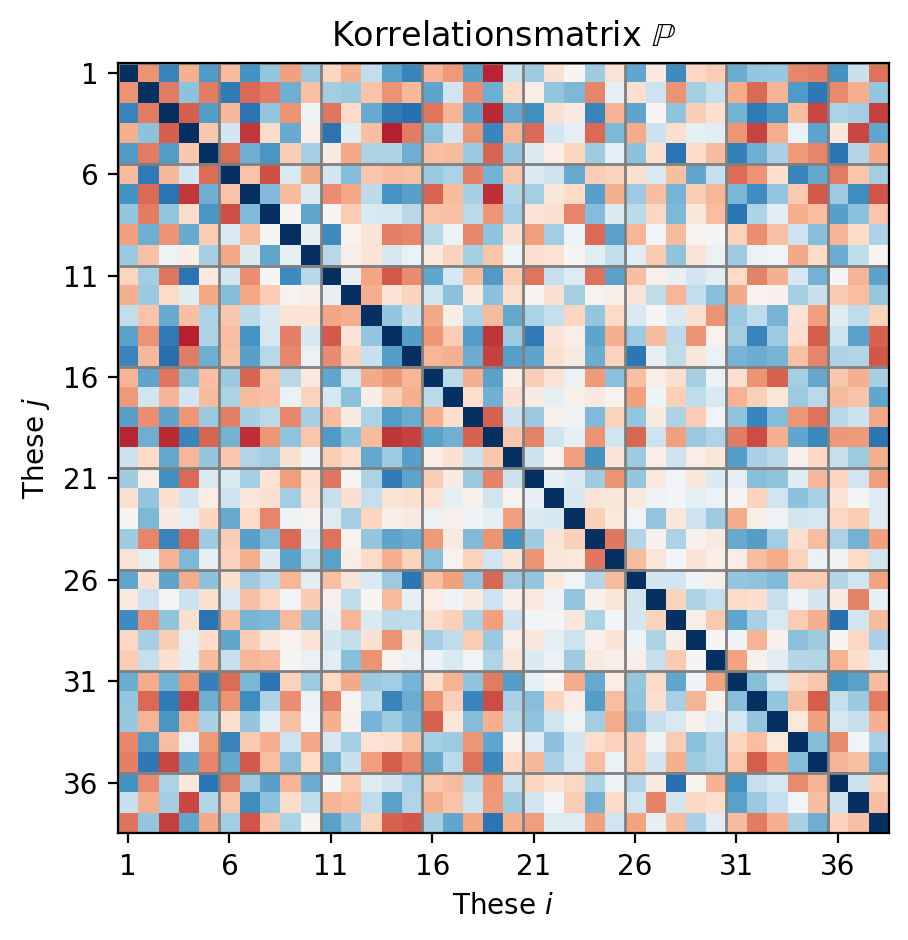

In [13]:
fig, ax = plt.subplots()
ax.set_aspect(1)
ax.imshow(P, vmin=-1, vmax=1, cmap="RdBu")
ax.set_title("Korrelationsmatrix $\mathbb{P}$")
ticks = np.arange(0, N_the+1, 5)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(ticks+1)
ax.set_yticklabels(ticks+1)
ax.hlines(ticks-0.5, -0.5, N_the-0.5, lw=1, color="gray")
ax.vlines(ticks-0.5, -0.5, N_the-0.5, lw=1, color="gray")
ax.set_xlabel("These $i$")
ax.set_ylabel("These $j$")
fig.tight_layout()

## Kovarianzmatrix

Die [Kovarianzmatrix](https://de.wikipedia.org/wiki/Kovarianzmatrix) ist ähnlich zur Korrelationsmatrix, wobei zusätzlich die Streuung der Parteipositionen pro These einen Einfluss hat.

Dies ist besonders auf der Diagonalen erkennbar, welche jetzt unterschiedliche Blautöne hat. Die Parteipositionen zu Thesen mit dunklerem Blauton weißen eine größere Streuung bzw. Varianz auf als Thesen mit hellerem Blauton. These $29$ (_"Bei der Videoüberwachung öffentlicher Plätze soll Gesichtserkennungssoftware eingesetzt werden dürfen."_) hat einen helleren Blauton als These $30$ (_"Auch Ehepaare ohne Kinder sollen weiterhin steuerlich begünstigt werden."_). Das bedeutet die Parteien haben zu These $29$ oftmals die gleiche Position (über diese Position selbst wird hier keine Aussage getroffen), wohingegen sie sich bei These $30$ deutlich unterscheiden. 

In [14]:
covX = np.cov(data.X.T)

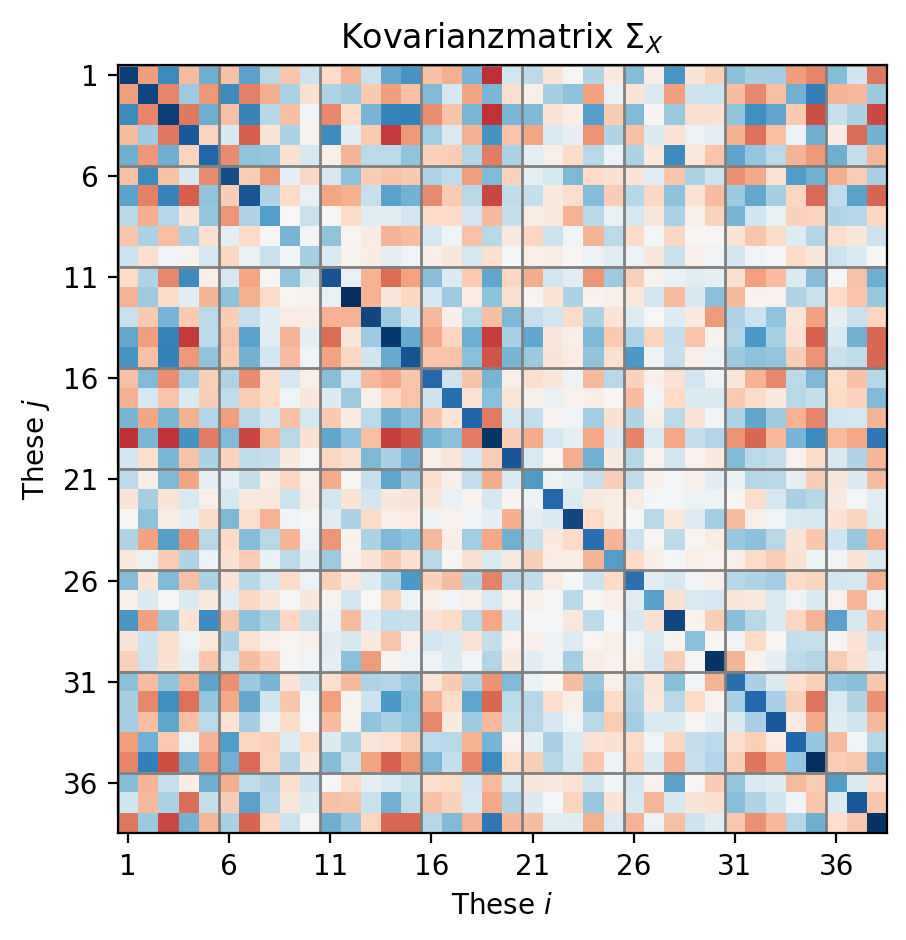

In [15]:
fig, ax = plt.subplots()
ax.set_aspect(1)
lim = np.abs(covX).max()
ax.imshow(covX, vmin=-lim, vmax=lim, cmap="RdBu")
ax.set_title("Kovarianzmatrix $\Sigma_X$")
ticks = np.arange(0, N_the+1, 5)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(ticks+1)
ax.set_yticklabels(ticks+1)
ax.hlines(ticks-0.5, -0.5, N_the-0.5, lw=1, color="gray")
ax.vlines(ticks-0.5, -0.5, N_the-0.5, lw=1, color="gray")
ax.set_xlabel("These $i$")
ax.set_ylabel("These $j$")
fig.tight_layout()

## Hauptkomponentenanalyse

Ziel der Hauptkomponentenanalyse ist es nun die Kovarianzmatrix zu diagonalisieren, sodass nur Einträge auf der Diagonalen existieren. Weiterhin sollen diese Einträge absteigend nach Varianz sortiert sein. In anderen Worten: Die Daten werden in ein neues Koordinatensystem transformiert, in welchem die Parteien auf der neuen $x$-Achse die größste Streuung aufweisen und in welchem die neuen Koordinatenachsen nicht korrelieren.

In [16]:
pca = PCA()
Y = pca.fit_transform(data.X)

Um den Erfolg der Hauptkomponentenanalyse zu bestätigen wird die Kovarianzmatrix im neuen Koordinatensystem geplottet. Und in der Tat hat die erste Hauptkomponente deutlich die größte Varianz (tiefblau), während die Hauptkomponenten nicht miteinander korrelieren (weiß).

In [17]:
covY = np.cov(Y.T)

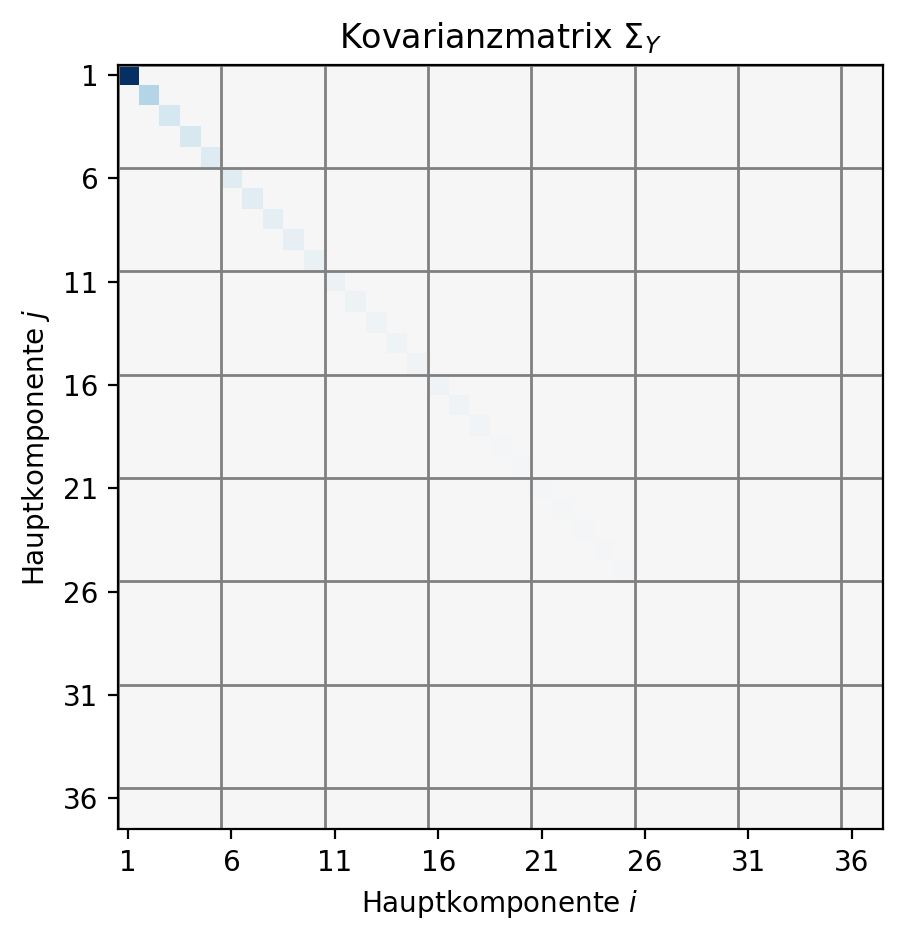

In [18]:
fig, ax = plt.subplots()
ax.set_aspect(1)
lim = np.abs(covY).max()
ax.imshow(covY, vmin=-lim, vmax=lim, cmap="RdBu")
ax.set_title("Kovarianzmatrix $\Sigma_Y$")
ticks = np.arange(0, N_komp+1, 5)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(ticks+1)
ax.set_yticklabels(ticks+1)
ax.hlines(ticks-0.5, -0.5, N_komp-0.5, lw=1, color="gray")
ax.vlines(ticks-0.5, -0.5, N_komp-0.5, lw=1, color="gray")
ax.set_xlabel("Hauptkomponente $i$")
ax.set_ylabel("Hauptkomponente $j$")
fig.tight_layout()

### Varianzbeiträge

Weiterhin lässt sich bestimmen, wieviel die einzelnen Hauptkomponenten zur Gesamtvarianz beitragen. Die erste Hauptkomponente trägt über $35\,\%$ zur Gesamtvarianz bei, die zweite Hauptkomponente über $10\,\%$. Gemeinsam tragen beide Komponente fast $50\,\%$ zur Gesamtvarianz bei.

In [19]:
expl_var_ratio = pca.explained_variance_ratio_

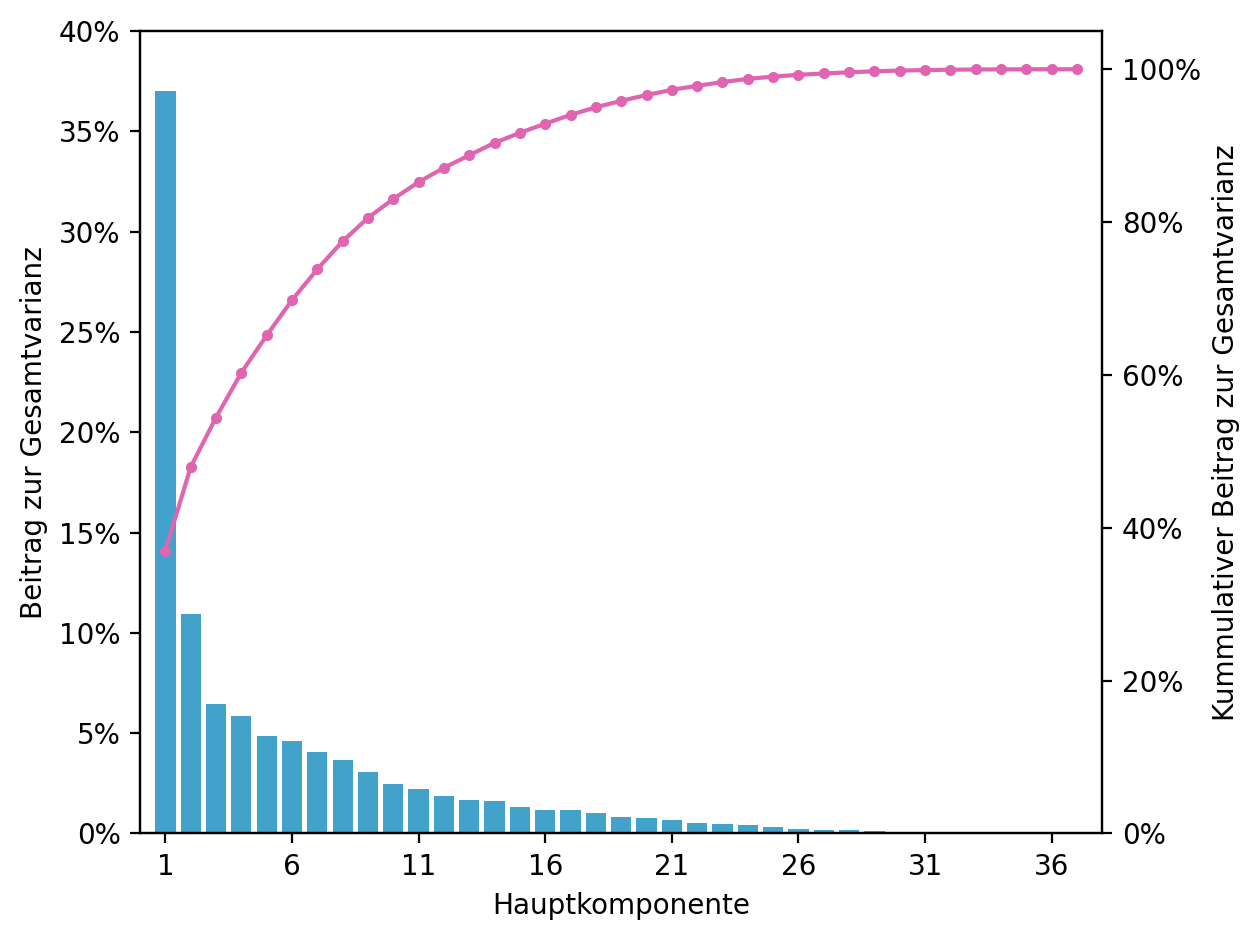

In [20]:
fig, ax = plt.subplots()
ax.bar(np.arange(N_komp)+1, expl_var_ratio, color="#43a2ca")
ax.set_xlabel("Hauptkomponente")
ax.set_ylabel("Beitrag zur Gesamtvarianz")
ax.set_xlim(0, N_komp+1)
ticks = np.arange(0, N_komp+1, 5)+1
ax.set_xticks(ticks)
ax.set_xticklabels(ticks)
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(["{:.0f}%".format(100*t) for t in ax.get_yticks()])
axr = ax.twinx()
axr.plot(np.arange(N_komp)+1, expl_var_ratio.cumsum(), ".-", c="#df65b0")
axr.set_ylabel("Kummulativer Beitrag zur Gesamtvarianz")
axr.set_ylim(0., 1.05)
axr.set_yticks(np.arange(0., 1.1, 0.2))
axr.set_yticklabels(["{:.0f}%".format(100*t) for t in axr.get_yticks()])
fig.tight_layout()

### Reduzierte Darstellung

Da die ersten beiden Hauptkomponenten schon fast die Hälfte der Gesamtvarianz tragen, lässt sich das System auch zweidimensional nur mit diesen Komponenten darstellen, ohne dass allzu viel Information verloren geht.

**Hinweis:** Diese Darstellung ist nur bedingt dazu geeignet, die politischen Nähe von Parteien zu analysieren, das sie nur eine zwei-dimensionale Projektion ist und ca. $50\,\%$ der Variationsinformation "versteckt" ist. In anderen Worten: Der Abstand, den Parteien in dieser Darstellung einnehmen, ist als untere Schranke zu sehen. Sie können sehr viel weiter voneinander entfernt sein.

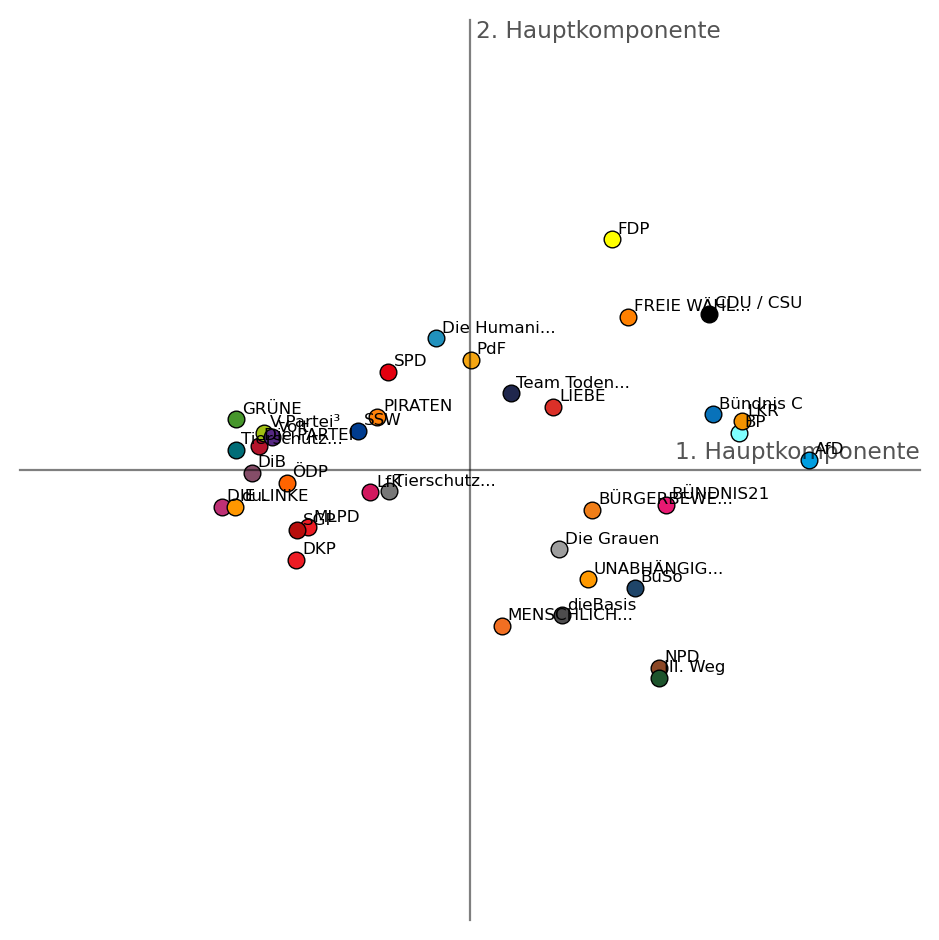

In [21]:
offset = 0.1
fig, ax = plt.subplots()
ax.set_aspect(1)
for i in range(N_par):
    ax.plot(Y[i, 0], Y[i, 1], "o", markersize=6, c=utils.color_dict[data.parties[i]], markeredgecolor="black", markeredgewidth=0.5)
    if True:
        ax.text(Y[i, 0]+offset, Y[i, 1]+offset, parties_short[i], fontsize=6)
lim = np.ceil(np.abs(Y).max())+1
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.set_xticks([])
ax.set_yticks([])
if True:
    ax.spines["left"].set_position("zero")
    ax.spines["bottom"].set_position("zero")
    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")
    ax.spines["left"].set_alpha(0.5)
    ax.spines["bottom"].set_alpha(0.5)
    ax.text(lim, 0.1, "1. Hauptkomponente", va="bottom", ha="right", fontsize="small", alpha=0.67)
    ax.text(0.1, lim, "2. Hauptkomponente", va="top", ha="left", fontsize="small", alpha=0.67)
else:
    ax.axis("off")
ax.set_xticklabels([])
ax.set_yticklabels([])
fig.tight_layout()

Interessanterweise spiegelt die erste Hauptkomponente oftmals das klassische Links-Rechts-Spektrum wieder. Das ist besonders bemerkenswert, da die Hauptkomponentenanalyse eine rein mathematische Operation ist, die kein politisches Vorwissen beinhaltet. Es könnte vorkommen, dass die "x"-Achse invertiert ist – dann stehen die "rechten Parteien" links und die "linken Parteien" rechts. In diesem Fall könnte man die erste Hauptkomponente mit $-1$ multiplizieren, um die gewohnte Darstellung zu erhalten.

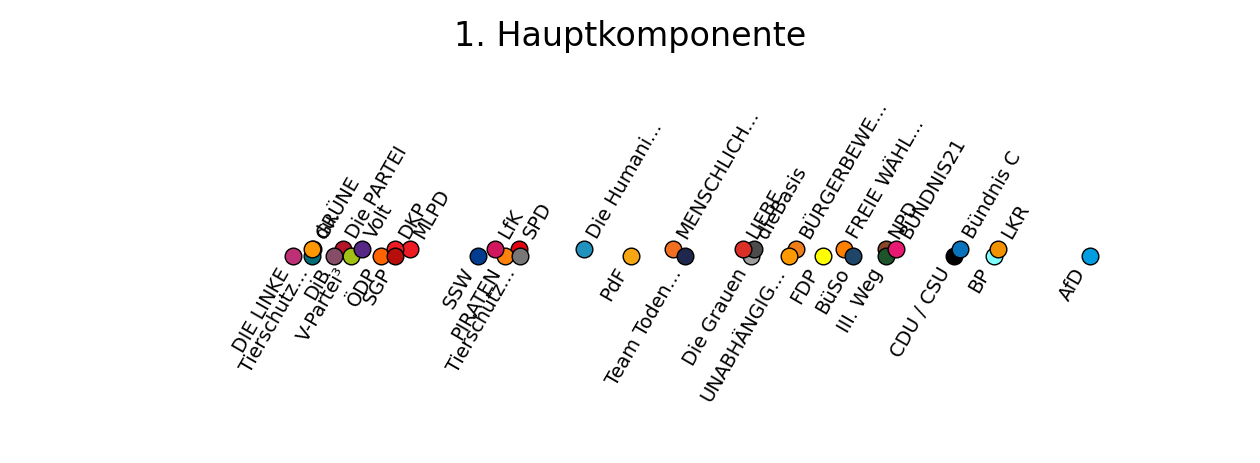

In [22]:
fig, ax = plt.subplots()
ax.set_aspect(1.)
i_sorted = np.argsort(Y[:, 0])
for i in range(N_par):
    up = (i==i_sorted).argmax()%2
    if up:
        ax.plot(Y[i, 0], 0.05, "o", markersize=6, c=utils.color_dict[data.parties[i]], markeredgecolor="black", markeredgewidth=0.5)
        ax.text(Y[i, 0], 0.15, parties_short[i], rotation=60, ha="left", va="bottom", fontsize="x-small")
    else:
        ax.plot(Y[i, 0], -0.05, "o", markersize=6, c=utils.color_dict[data.parties[i]], markeredgecolor="black", markeredgewidth=0.5)
        ax.text(Y[i, 0], -0.15, parties_short[i], rotation=60, ha="right", va="top", fontsize="x-small")
lim = np.ceil(np.abs(Y).max())+1
ax.set_xlim(-lim, lim)
ax.set_ylim(-2.5, 2.5)
ax.axis("off")
ax.set_title("1. Hauptkomponente")
fig.tight_layout()

### Beiträge zu den Hauptkomponenten

Da die Hauptkomponentenanalyse eine Transformation in ein neues Koordinatensystem ist, beinhalten die neuen Achsen (die Hauptkomponenten) Beiträge von allen These zu verschiedenen Anteilen. Es ist möglich darzustellen, welche Thesen den größten Anteil zu einer Hauptkomponente haben.

Der folgende Plot zeigt um welchen Betrag eine Partei in positiver Richtung entlang der ersten Hauptkomponente wandert, wenn sie einer These _zustimmt_. Wenn eine Partei also These $4$ (_"Die Förderung von Windenergie soll beendet werden."_) zustimmt, wandert sie nach rechts. Wenn eine Partei These $3$ (_"Bei Bundestagswahlen sollen auch Jugendliche ab 16 Jahren wählen dürfen."_), wandert sie nach links. Der Plot zeigt die Thesen, welche am stärksten bei Zustimmung die erste Hauptkomponente beeinflussen, also am polarisierendsten sind.

**Hinweis:** Bei Ablehnung einer These bedeutet das nicht, dass eine Partei um den selben Betrag in die entgegengesetzte Richtung wandert, und bei neutraler Haltung zu einer These bedeutet das nicht, dass eine Partei nicht entlang der Achse wandert. Der Grund dafür ist, dass der Schwerpunkt der Parteipositionen üblicherweise nicht auf _"neutrale Position"_ zentriert ist.

In [23]:
komp_the = np.empty((N_komp, N_the))
i_sorted = np.empty((N_komp, N_the), dtype=int)
for i in range(N_komp):
    komp_the[i, :] = (1. - data.X.mean(0)) * pca.components_.T[:, i]
    i_sorted[i, :] = komp_the[i, :].argsort()
    komp_the[i, :] = komp_the[i, :][i_sorted[i, :]]

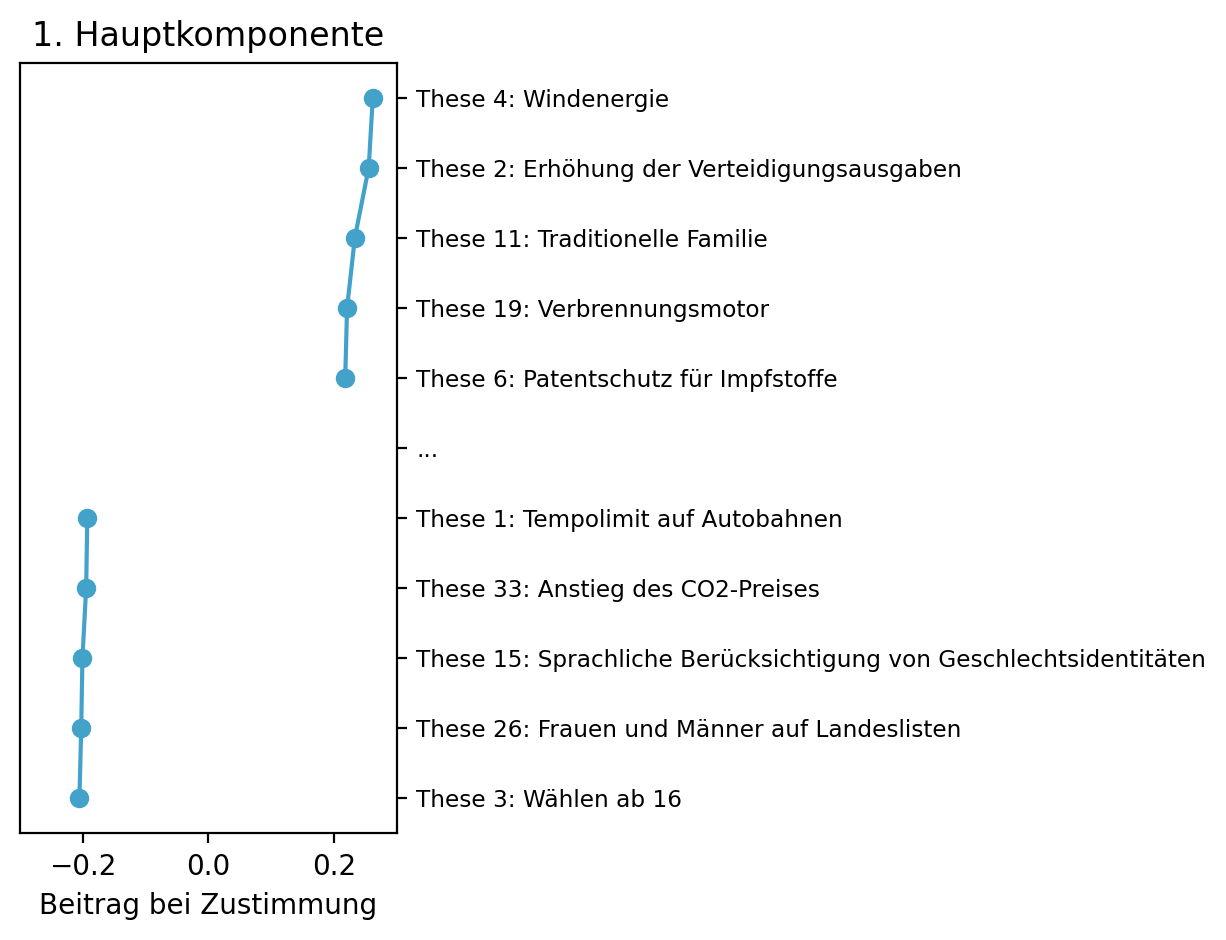

In [24]:
N_cut, N_pad = 5, 1
N_k = 1
lim = np.ceil(np.abs(10.*komp_the[N_k-1, :])).max()/10.
fig, ax = plt.subplots()
ax.plot(komp_the[N_k-1, :N_cut], np.arange(2*N_cut+N_pad)[:N_cut], "o-",  markersize=6, c="#43a2ca")
ax.plot(komp_the[N_k-1, -N_cut:], np.arange(2*N_cut+N_pad)[-N_cut:], "o-",  markersize=6, c="#43a2ca")
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set_yticks(np.arange(2*N_cut+N_pad))
i_labels = list(i_sorted[N_k-1, :N_cut]) + list(i_sorted[N_k-1, -N_cut:])
ticklabels = ["These {:d}: {}".format(i+1, data.statements[i]) for i in i_labels[:N_cut]] + N_pad*["..."] + ["These {:d}: {}".format(i+1, data.statements[i]) for i in i_labels[-N_cut:]]
ax.set_yticklabels(ticklabels, fontsize="small")
ax.set_xlabel("Beitrag bei Zustimmung")
ax.set_xlim(-lim, lim)
ax.set_title("{:d}. Hauptkomponente".format(N_k))
fig.tight_layout()

Die erste Hauptkomponente repräsentiert also üblicherweise das "Links-Rechts-Spektrum". Aber was repräsentiert die zweite Hauptkomponente?

Das lässt sich an folgendem Plot ablesen. Das sind typischerweise polarisierende, Wahlkampf-spezifische Themen, die je nach Wahlkampf wechseln können. In diesem Beispiel wandert eine Partei nach oben in positive Richtung der zweiten Hauptkomponente wenn sie These $6$ (_"Impfstoffe gegen Covid-19 sollen weiterhin durch Patente geschützt sein."_) zustimmt, und nach unten, wenn sie These $25$ (_"Deutschland soll aus der Europäischen Union austreten."_) zustimmt.

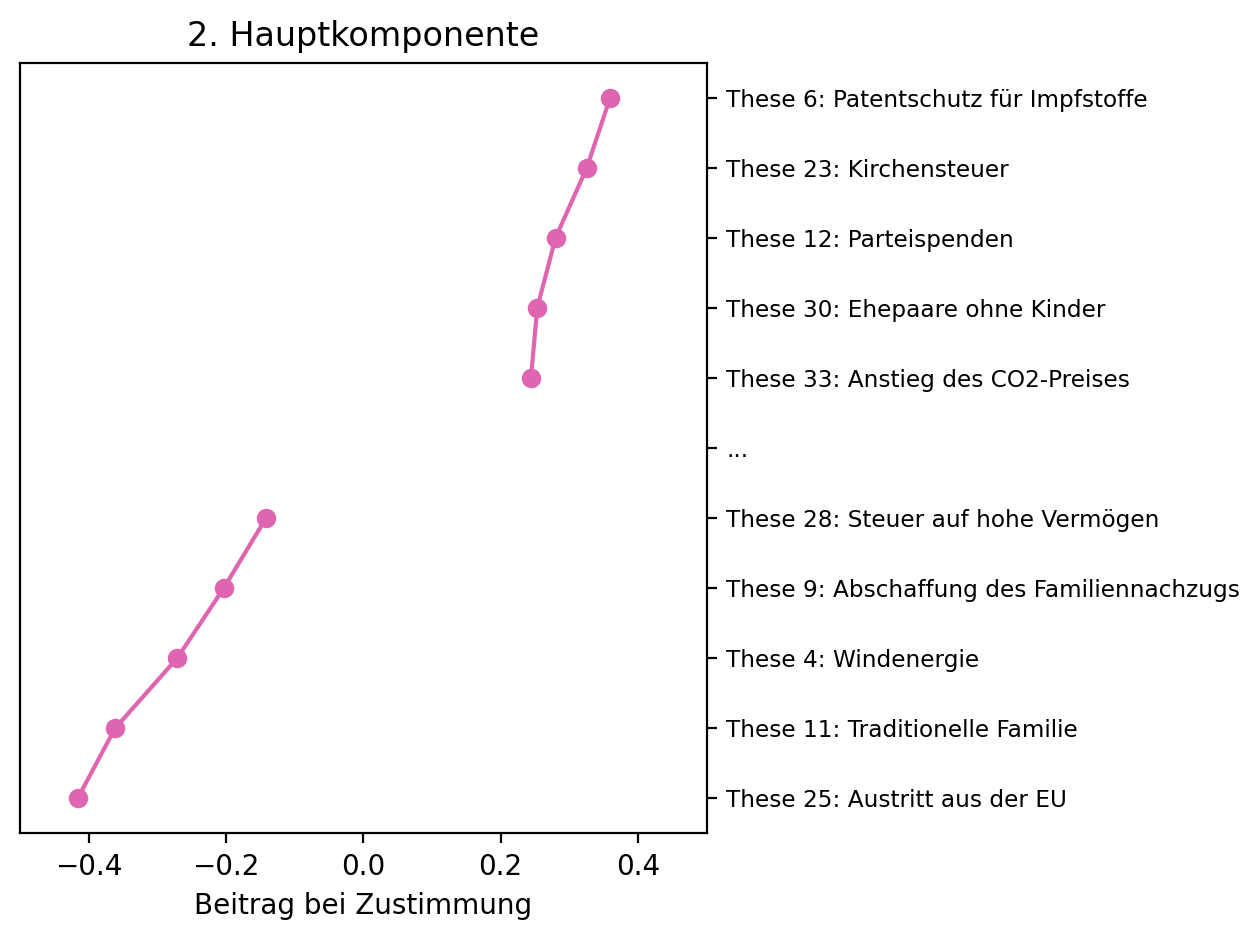

In [25]:
N_cut, N_pad = 5, 1
N_k = 2
lim = np.ceil(np.abs(10.*komp_the[N_k-1, :])).max()/10.
fig, ax = plt.subplots()
ax.plot(komp_the[N_k-1, :N_cut], np.arange(2*N_cut+N_pad)[:N_cut], "o-",  markersize=6, c="#df65b0")
ax.plot(komp_the[N_k-1, -N_cut:], np.arange(2*N_cut+N_pad)[-N_cut:], "o-",  markersize=6, c="#df65b0")
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set_yticks(np.arange(2*N_cut+N_pad))
i_labels = list(i_sorted[N_k-1, :N_cut]) + list(i_sorted[N_k-1, -N_cut:])
ticklabels = ["These {:d}: {}".format(i+1, data.statements[i]) for i in i_labels[:N_cut]] + N_pad*["..."] + ["These {:d}: {}".format(i+1, data.statements[i]) for i in i_labels[-N_cut:]]
ax.set_yticklabels(ticklabels, fontsize="small")
ax.set_xlabel("Beitrag bei Zustimmung")
ax.set_xlim(-lim, lim)
ax.set_title("{:d}. Hauptkomponente".format(N_k))
fig.tight_layout()

## Übereinstimmung der Parteien zueinander

Weiterhin lässt sich der Abstand der Parteien zueinander im $N$-dimensionalen Raum berechnen. Dazu kann man die $2$-Norm bzw. den Euklidischen Abstand berechnen.

Der nachfolgende Plot zeigt den Euklidischen Abstand aller Parteien voneinander im $N$-dimensionalen "Thesenraum", wobei die Parteien nach ihrer ersten Hauptkomponenten angeordnet sind. Je größer der Wert, desto größer die Übereinstimmung bzw. desto kleiner der Euklidische Abstand. Für jede Partei (horizontale Zeile) sind jeweils der größste und kleinste Wert hevorgehoben.

**Hinweis:** Diese Darstellung ist nur bedingt dazu geeignet, um eine Aussage darüber zu treffen, ob Parteien eine Koalition eingehen könnten oder nicht. Einerseits geht keine Gewichtung bzw. "rote Linien" der Parteien bezüglich der Thesen in die Berechnung ein. Und andererseits ist der berechnete Wert auch von der Auswahl der Thesen abhängig. Zwei Parteien werden eine geringere Übereinstimmung haben, wenn die Thesen einen besonderen Fokus auf ein Thema haben, bei welchen die Positionen der beiden Parteien besonders verschieden sind.

In [26]:
norm = np.empty((N_par, N_par))
i_sorted = np.argsort(Y[:, 0])
for i, ii in enumerate(i_sorted):
    for j, jj in enumerate(i_sorted):
        if i==j:
            norm[i, i] = np.nan
            continue
        norm[i, j] = np.linalg.norm(data.X[ii, :]-data.X[jj, :])
        norm[j, i] = norm[i, j]
norm_max = 2.*N_the**0.5
norm = (norm_max-norm) / norm_max
norm_min = norm[np.where(~np.isnan(norm))].min()
norm_max = norm[np.where(~np.isnan(norm))].max()

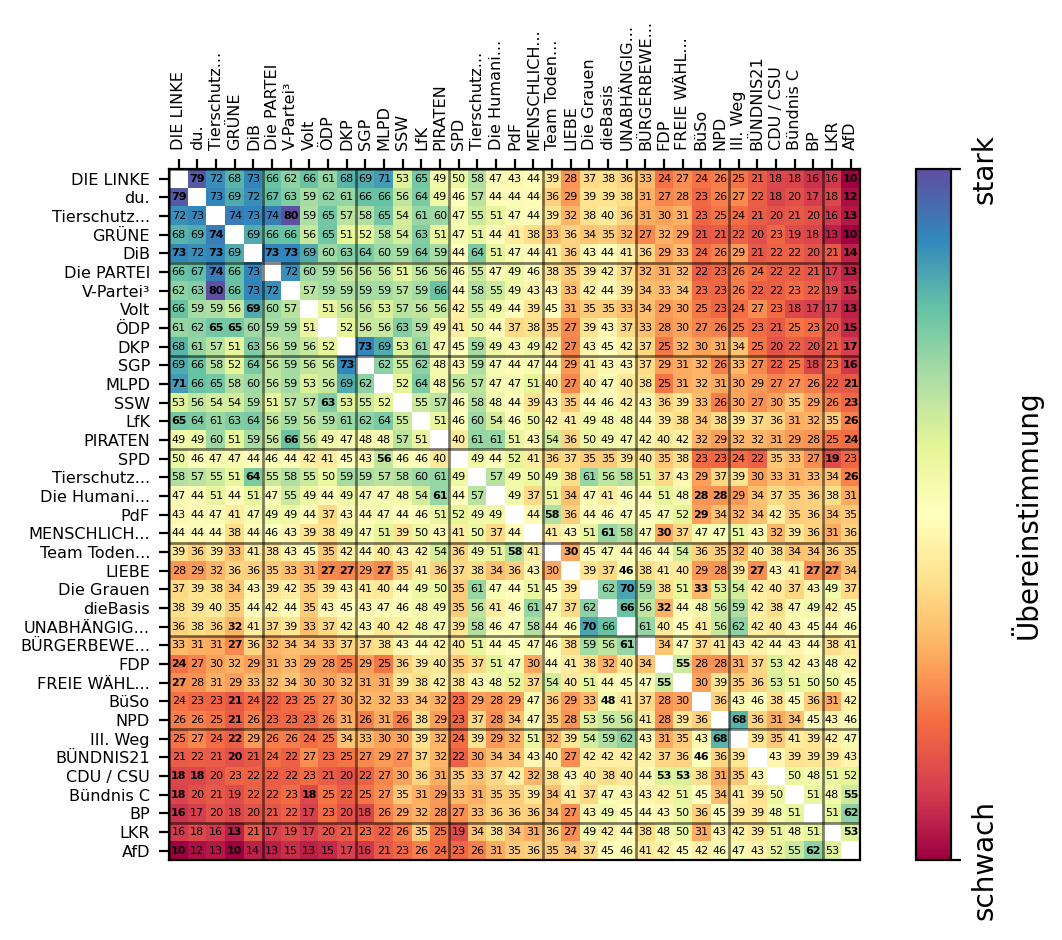

In [27]:
fig, ax = plt.subplots()
ax.set_aspect(1)
p = ax.matshow(norm, vmin=norm_min, vmax=norm_max, cmap="Spectral")
ax.set_xticks(np.arange(N_par))
ax.set_yticks(np.arange(N_par))
ax.set_xticklabels(np.array(parties_short)[i_sorted], rotation=90, fontsize="xx-small")
ax.set_yticklabels(np.array(parties_short)[i_sorted], fontsize="xx-small")
ticks = np.arange(0, N_par, 5)
ax.xaxis.tick_top()
ax.hlines(ticks-0.5, -0.5, N_komp-0.5, lw=1, color="black", alpha=0.5)
ax.vlines(ticks-0.5, -0.5, N_komp-0.5, lw=1, color="black", alpha=0.5)
cbar = plt.colorbar(p, ticks=[norm_min, norm_max])
cbar.set_label("Übereinstimmung")
cbar.set_ticklabels(["schwach", "stark"], rotation=90, va="center")
if True:
    for i in range(N_par):
        for j in range(N_par):
            if j==i:
                continue
            nmax = np.round(norm[np.where(np.isfinite(norm[:, j])), j].max(), 2)
            nmin = np.round(norm[np.where(np.isfinite(norm[:, j])), j].min(), 2)
            if np.round(norm[i, j], 2)==nmin or np.round(norm[i, j], 2)==nmax:
                fontweight="bold"
            else:
                fontweight="normal"
            ax.text(i, j, "{:.0f}".format(norm[i, j]*100), fontsize=4, va="center", ha="center", fontweight=fontweight)
fig.tight_layout()

## Zusätzliche Partei hinzufügen

Abschließend sei erwähnt, dass es auch nach Berechnung der Hauptkomponentenanalyse möglich ist, einen beliebigen Thesen-Vektor in die neuen Koordinaten zu überführen.

Hier am Beispiel eines zufällig generierten Vektors.

In [28]:
X_random = np.random.randint(-1, high=1, size=(1, N_the))
Y_random = pca.transform(X_random)

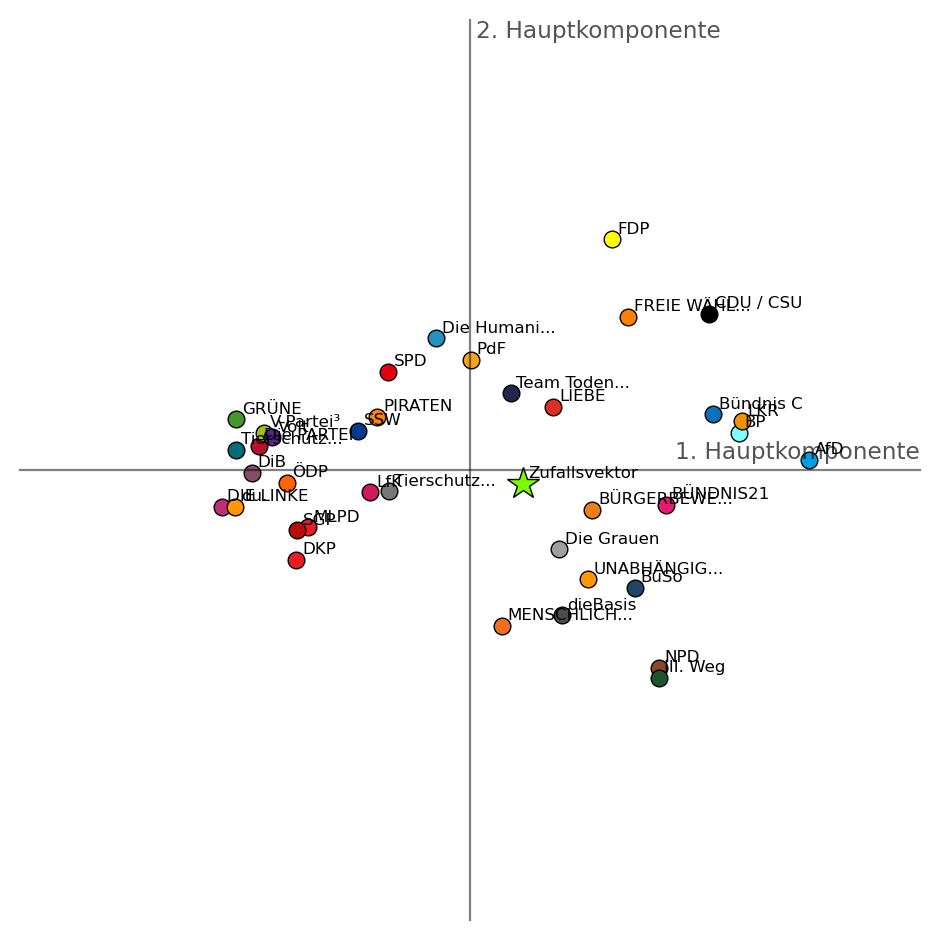

In [29]:
offset = 0.1
fig, ax = plt.subplots()
ax.set_aspect(1)
for i in range(N_par):
    ax.plot(Y[i, 0], Y[i, 1], "o", markersize=6, c=utils.color_dict[data.parties[i]], markeredgecolor="black", markeredgewidth=0.5)
    if True:
        ax.text(Y[i, 0]+offset, Y[i, 1]+offset, parties_short[i], fontsize=6)
ax.plot(Y_random[0, 0], Y_random[0, 1], "*", markersize=12, c="lawngreen", markeredgecolor="black", markeredgewidth=0.5)
ax.text(Y_random[0, 0]+offset, Y_random[0, 1]+offset, "Zufallsvektor", fontsize=6)
lim = np.ceil(np.abs(Y).max())+1
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.set_xticks([])
ax.set_yticks([])
if True:
    ax.spines["left"].set_position("zero")
    ax.spines["bottom"].set_position("zero")
    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")
    ax.spines["left"].set_alpha(0.5)
    ax.spines["bottom"].set_alpha(0.5)
    ax.text(lim, 0.1, "1. Hauptkomponente", va="bottom", ha="right", fontsize="small", alpha=0.67)
    ax.text(0.1, lim, "2. Hauptkomponente", va="top", ha="left", fontsize="small", alpha=0.67)
else:
    ax.axis("off")
ax.set_xticklabels([])
ax.set_yticklabels([])
fig.tight_layout()